In [ ]:
!pip install -U scikit-learn==1.0.2

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
#read data from file
data =pd.read_csv('/content/drive/MyDrive/MLAssignment02/Iris.csv')

In [ ]:
data['Species'] = data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [ ]:
#delete id from dataset
data.drop('Id',axis=1,inplace=True)

In [ ]:
#Seperate dependent and independent feature
x = data.drop('Species',axis=1)
y = data['Species']

In [ ]:
#split it into training and testing part
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

#train the model
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#predict for training as well as testing 
tr_predict = model.predict(x_train)
ts_predict = model.predict(x_test)

In [ ]:
#check the accuracy for training as well as testing
from sklearn.metrics import accuracy_score
print('Training accuracy:', accuracy_score(y_train, tr_predict))
print('Testing accuracy:', accuracy_score(y_test, ts_predict))

Training accuracy: 1.0
Testing accuracy: 1.0


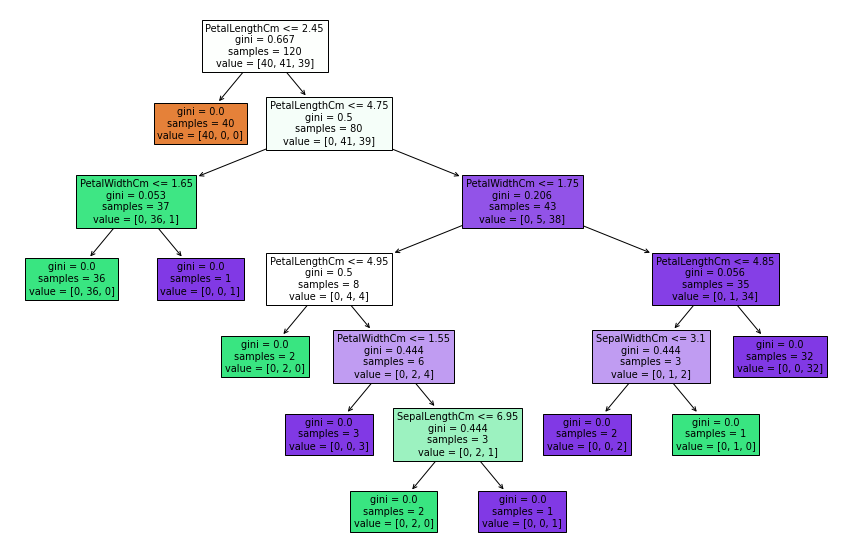

In [ ]:
#plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model,filled=True,feature_names=x.columns)
plt.savefig('Iris-Decision Tree')
plt.show()

In [ ]:
df_importance = pd.DataFrame({'Features': x.columns, 'Importances' : model.feature_importances_})
df_importance

,Features,Importances
0,SepalLengthCm,0.016670
1,SepalWidthCm,0.016670
2,PetalLengthCm,0.889473
3,PetalWidthCm,0.077186


In [ ]:
import pickle
with open('iris_classifier_v2.pickle', 'wb') as f:
  pickle.dump(model,f)